# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.198647e+01     7.668040e+00
 * time: 0.0053310394287109375
     1     2.643956e+01     5.054280e+00
 * time: 0.015568971633911133
     2     2.296392e+01     1.035737e+01
 * time: 0.039177894592285156
     3     1.258237e+01     1.756939e+00
 * time: 0.06711006164550781
     4     1.200067e+01     2.253060e+00
 * time: 0.08614683151245117
     5     1.145521e+01     1.880745e+00
 * time: 0.1048738956451416
     6     1.095275e+01     1.244304e+00
 * time: 0.12380599975585938
     7     1.032077e+01     1.658069e+00
 * time: 0.14310383796691895
     8     9.787377e+00     8.088560e-01
 * time: 0.16231083869934082
     9     9.495402e+00     6.395173e-01
 * time: 0.18099403381347656
    10     9.326473e+00     6.869507e-01
 * time: 0.19968295097351074
    11     9.175796e+00     4.310234e-01
 * time: 0.21861791610717773
    12     9.077322e+00     4.482999e-01
 * time: 0.23764801025390625
    13     9.057700e+00     6.553020e-01
 * ti

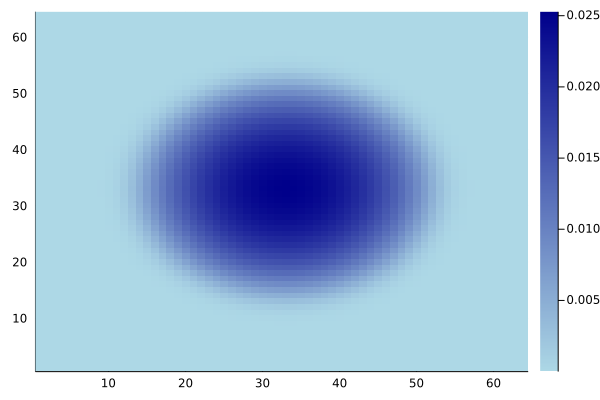

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)